# Interview Challenge

The objective of this challenge is to assess your ability to:
- Perform basic data manipulation and data pre-processing
- Demonstrate awareness of the computations involved
- Perform feature engineering
- Train and tune ML models
- Asses performance of the ML models
- Obtaining clear, useful, and business driven insights from data and models

**The objective of the model you create will be to predict whether a client will rate as “high” a movie or not.**

**Note:**
-  If a user has several ratings, then each of her ratings must appear on a different row
- Each column will correspond to a predictive variable 
- Response variable:
    - 1 in case the rating is >= 4 (flag for "high" rating)
    - 0 in case the rating is < 4
- Assume that this model will be used to generate online predictions on a production setting, and be aware of the implications of that, and put special attention for data leakage

## 1. EDA

### **tag.csv**

In [18]:
import pandas as pd
tag_df = pd.read_csv('data/tag.csv')

In [19]:
from sklearn.model_selection import train_test_split

# Main split 70% train - 30% test
tag_train, tag_test = train_test_split(tag_df, random_state=123, test_size=0.3)
tag_train.head(5)

,userId,movieId,tag,timestamp
339770,103076,4743,remake,2006-06-04 02:20:02
379512,119367,7158,American dream,2009-05-12 04:41:26
248167,71833,48304,atmospheric,2012-10-17 21:49:53
10906,1741,111722,"quote:\\""Climb the stairway of mystery then cr...",2014-07-05 00:36:49
190117,57434,215,bittersweet,2011-07-08 12:50:15


In [54]:
# Reset index because it looks better :)
tag_train = tag_train.reset_index(drop=True)
tag_test = tag_test.reset_index(drop=True)
tag_train.head(5)

,userId,movieId,tag,timestamp,tag_length,datetime,year
0,103076,4743,remake,2006-06-04 02:20:02,6.0,2006-06-04 02:20:02,2006
1,119367,7158,American dream,2009-05-12 04:41:26,14.0,2009-05-12 04:41:26,2009
2,71833,48304,atmospheric,2012-10-17 21:49:53,11.0,2012-10-17 21:49:53,2012
3,1741,111722,"quote:\\""Climb the stairway of mystery then cr...",2014-07-05 00:36:49,122.0,2014-07-05 00:36:49,2014
4,57434,215,bittersweet,2011-07-08 12:50:15,11.0,2011-07-08 12:50:15,2011


In [27]:
print("Shape:", tag_train.shape) # (325894, 4)
print("Info:", tag_train.info()) 

Shape: (325894, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 325894 entries, 339770 to 249342
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     325894 non-null  int64 
 1   movieId    325894 non-null  int64 
 2   tag        325882 non-null  object
 3   timestamp  325894 non-null  object
dtypes: int64(2), object(2)
memory usage: 12.4+ MB
Info: None


In [30]:
# Check for NaNs
tag_train.isna().sum().sort_values(ascending=False)

tag          12
userId        0
movieId       0
timestamp     0
dtype: int64

In [33]:
# Check number of unique users (7094)
tag_train.nunique()

userId         7094
movieId       18004
tag           32313
timestamp    302932
dtype: int64

In [34]:
# Check most common tags
tag_train["tag"].value_counts().head(20)

tag
sci-fi                2353
based on a book       2297
atmospheric           2022
comedy                1938
action                1887
surreal               1708
BD-R                  1634
twist ending          1628
funny                 1424
dystopia              1407
stylized              1366
quirky                1340
dark comedy           1294
classic               1243
psychology            1235
fantasy               1183
romance               1073
visually appealing    1066
time travel           1058
disturbing            1022
Name: count, dtype: int64

<Axes: ylabel='tag'>

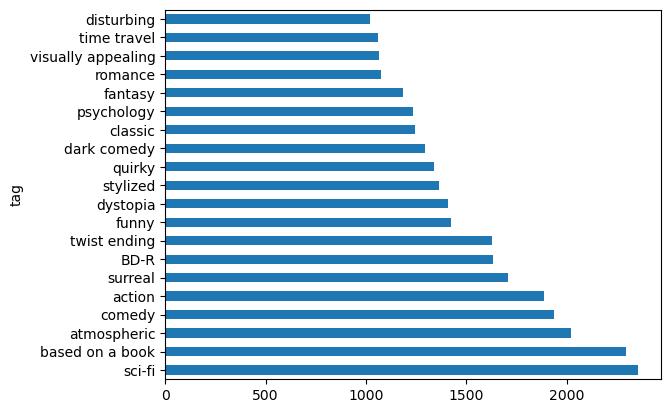

In [35]:
tag_train["tag"].value_counts().head(20).plot(kind="barh")

In [36]:
# Check insights about tags 
tag_train["tag_length"] = tag_train["tag"].str.len()
tag_train["tag_length"].describe()

count    325882.000000
mean         11.076644
std           6.163133
min           1.000000
25%           7.000000
50%          10.000000
75%          14.000000
max         241.000000
Name: tag_length, dtype: float64

In [43]:
# Check usual behavior from users when using tags 
tags_per_movie = tag_train.groupby("movieId").size()
tags_per_movie.describe()

count    18004.000000
mean        18.101200
std         51.003086
min          1.000000
25%          2.000000
50%          4.000000
75%         12.000000
max       1408.000000
dtype: float64

In [45]:
# Change datatype of timestamp
tag_train["datetime"] = pd.to_datetime(tag_train["timestamp"])
tag_train["year"] = tag_train["datetime"].dt.year

Text(0.5, 1.0, 'Tag usage over time')

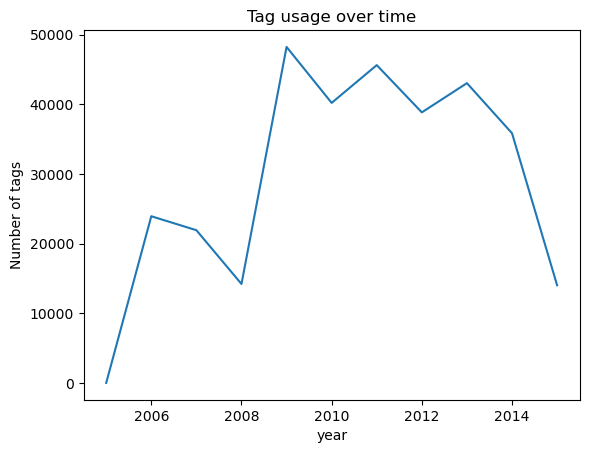

In [47]:
# Plot number of tags used each year
ax = tag_train.groupby("year").size().plot()
ax.set_ylabel("Number of tags")
ax.set_title("Tag usage over time")

In [62]:
tag_train["year"].describe()

count    325894.000000
mean       2010.698445
std           2.501622
min        2005.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2015.000000
Name: year, dtype: float64

### **rating.csv**

In [23]:
rating_df = pd.read_csv('data/rating.csv')
rating_train, rating_test = train_test_split(rating_df, random_state=123, test_size=0.3)
rating_train.head(5)

,userId,movieId,rating,timestamp
19165361,132599,45208,2.5,2012-06-19 22:49:51
12156569,83970,1617,5.0,2011-06-06 00:10:35
13004234,89791,2616,4.0,2002-06-28 04:00:05
355257,2395,1663,4.0,2006-04-27 22:11:56
12137396,83840,282,3.0,1996-05-06 14:19:04


In [53]:
# Reset index because it looks better :)
rating_train = rating_train.reset_index(drop=True)
rating_test = rating_test.reset_index(drop=True)
rating_train.head(5)

,userId,movieId,rating,timestamp
0,132599,45208,2.5,2012-06-19 22:49:51
1,83970,1617,5.0,2011-06-06 00:10:35
2,89791,2616,4.0,2002-06-28 04:00:05
3,2395,1663,4.0,2006-04-27 22:11:56
4,83840,282,3.0,1996-05-06 14:19:04


In [48]:
print("Shape:", rating_train.shape) # (14000184, 4)
print("Info:", rating_train.info()) 

Shape: (14000184, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 14000184 entries, 19165361 to 4967934
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 534.1+ MB
Info: None


In [24]:
rating_train.describe()

,userId,movieId,rating
count,1.400018e+07,1.400018e+07,1.400018e+07
mean,6.904628e+04,9.040399e+03,3.525504e+00
std,4.003898e+04,1.978830e+04,1.052068e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914800e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [49]:
# Check for NaNs
rating_train.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [51]:
# Check if any user rated the same movie more than once
rating_train.duplicated(subset=["userId", "movieId"]).sum()

0

<Axes: >

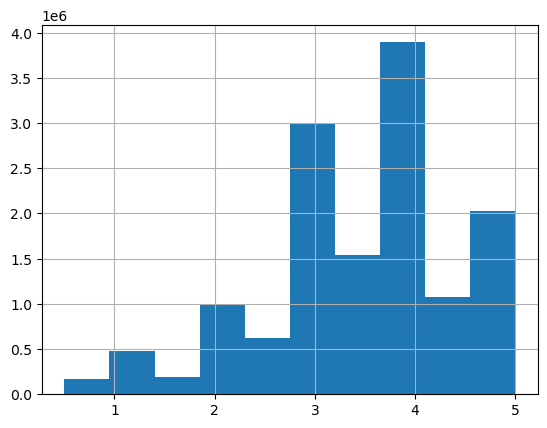

In [52]:
# Check the rating distribution
rating_train["rating"].hist(bins=10)

In [55]:
# Check unique vals (138,493 users rating 25,309 movies)
rating_train.nunique()

userId         138493
movieId         25309
rating             10
timestamp    11307827
dtype: int64

In [56]:
# Avg of 101 ratings per user
ratings_per_user = rating_train.groupby("userId").size()
ratings_per_user.describe()

count    138493.000000
mean        101.089470
std         161.291046
min           5.000000
25%          24.000000
50%          47.000000
75%         108.000000
max        6479.000000
dtype: float64

In [58]:
# Avg of 553 ratings per movie
ratings_per_movie = rating_train.groupby("movieId").size()
ratings_per_movie.describe()

count    25309.000000
mean       553.170177
std       2217.402834
min          1.000000
25%          3.000000
50%         16.000000
75%        164.000000
max      47127.000000
dtype: float64

In [59]:
# How harshly do users rate the movies? Avg of 3.6
user_mean_rating = rating_train.groupby("userId")["rating"].mean()
user_mean_rating.describe()

count    138493.000000
mean          3.627113
std           0.452411
min           0.500000
25%           3.363636
50%           3.653846
75%           3.931250
max           5.000000
Name: rating, dtype: float64

In [60]:
# What are the avg ratings for movies? avg of 3.1
movie_mean_rating = rating_train.groupby("movieId")["rating"].mean()
movie_mean_rating.describe()

count    25309.000000
mean         3.145983
std          0.667930
min          0.500000
25%          2.817500
50%          3.247582
75%          3.576923
max          5.000000
Name: rating, dtype: float64

<Axes: xlabel='year'>

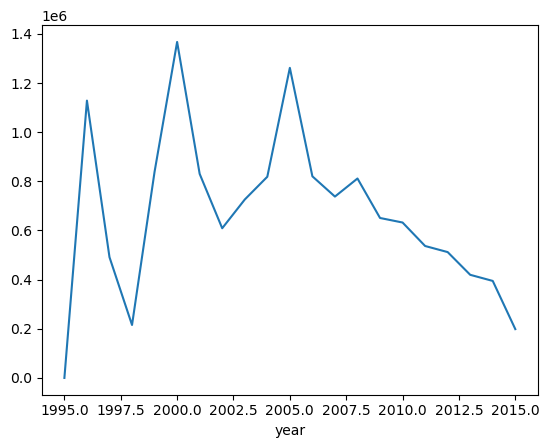

In [61]:
# Change data type
rating_train["datetime"] = pd.to_datetime(rating_train["timestamp"])
rating_train["year"] = rating_train["datetime"].dt.year

# Check number of ratings over time
rating_train.groupby("year").size().plot()

<Axes: xlabel='year'>

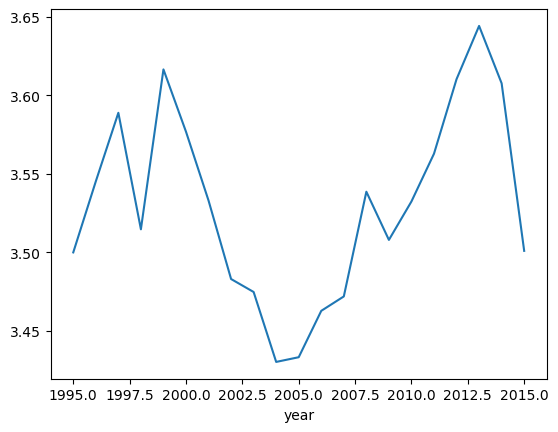

In [64]:
# Check avg rating score over time 
rating_train.groupby("year")["rating"].mean().plot()

In [63]:
rating_train["year"].describe()

count    1.400018e+07
mean     2.004379e+03
std      5.177134e+00
min      1.995000e+03
25%      2.000000e+03
50%      2.004000e+03
75%      2.008000e+03
max      2.015000e+03
Name: year, dtype: float64

### **movie.csv**

In [70]:
movie_df = pd.read_csv('data/movie.csv')
movie_train, movie_test = train_test_split(movie_df, random_state=123, test_size=0.3)

In [71]:
# Reset index because it looks better :)
movie_train = movie_train.reset_index(drop=True)
movie_test = movie_test.reset_index(drop=True)
movie_train.head(5)

,movieId,title,genres
0,30958,Who's the Caboose? (1997),Comedy|Documentary
1,74673,Fast Lane (2009),Action|Drama
2,5776,Only When I Laugh (1981),Comedy|Drama
3,1031,Bedknobs and Broomsticks (1971),Adventure|Children|Musical
4,27309,Restless (Levottomat) (2000),Drama|Romance


In [78]:
print("Shape:", movie_train.shape) # (19094, 4)
print("Info:", movie_train.info()) 

Shape: (19094, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19094 entries, 0 to 19093
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  19094 non-null  int64  
 1   title    19094 non-null  object 
 2   genres   19094 non-null  object 
 3   year     19059 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 596.8+ KB
Info: None


In [73]:
# Extract the year from the title & check if there's any year missing/get insights
movie_train["year"] = (movie_train["title"].str.extract(r"\((\d{4})\)$").astype("float"))
print("Describe:", movie_train["year"].describe())
print("# of NaNs:", movie_train["year"].isna().sum())

Describe: count    19059.000000
mean      1989.494517
std         23.345844
min       1891.000000
25%       1977.000000
50%       1998.000000
75%       2008.000000
max       2015.000000
Name: year, dtype: float64
# of NaNs: 35


In [77]:
# Check the titles of the movies without a year
print(movie_train.loc[movie_train["year"].isna(), "title"])

753      Legend of Suram Fortress, The (Ambavi Suramis ...
1248                        Craigslist Killer, The (2011) 
2501                                         In Our Garden
3112                                         Li'l Quinquin
4606           World According to Dick Cheney, The (2013) 
4883                    Stephen Fry In America - New World
5566                     11'09\\"01 - September 11 (2002)"
6296     Mona and the Time of Burning Love (Mona ja pal...
7464     Den tatuerade änkan (Tattooed Widow, The) (1998) 
7874                                  Net 2.0, The (2006) 
8242                                             Babylon 5
8284     Pool, The (Swimming Pool - Der Tod feiert mit)...
9675                   National Theatre Live: Frankenstein
9789     Age of the Medici, The (L'età di Cosimo de Med...
10427                                   Truth, The (2010) 
11258    Suicide Shop, The (Le magasin des suicides) (2...
11328                                   Slaying the Badg

<Axes: >

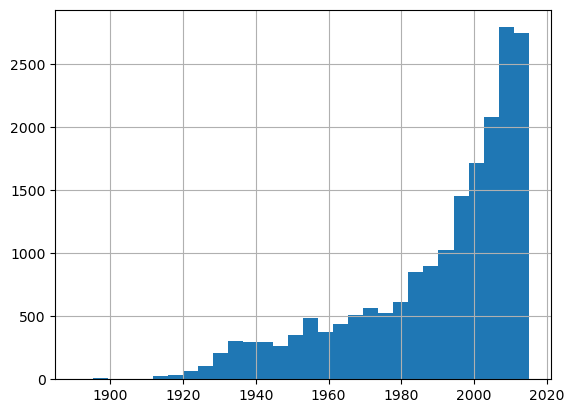

In [74]:
# plot # of movies from each year
movie_train["year"].hist(bins=30)

In [79]:
# Check genres from movies (after splitting them)
# .explode() transforms each element of a list-like col (e.g., lists, tuples, or np arrays) into a separate row
genres_split = (movie_train.assign(genres=movie_train["genres"].str.split("|")).explode("genres"))
genres_split.head(5)

,movieId,title,genres,year
0,30958,Who's the Caboose? (1997),Comedy,1997.0
0,30958,Who's the Caboose? (1997),Documentary,1997.0
1,74673,Fast Lane (2009),Action,2009.0
1,74673,Fast Lane (2009),Drama,2009.0
2,5776,Only When I Laugh (1981),Comedy,1981.0


<Axes: ylabel='genres'>

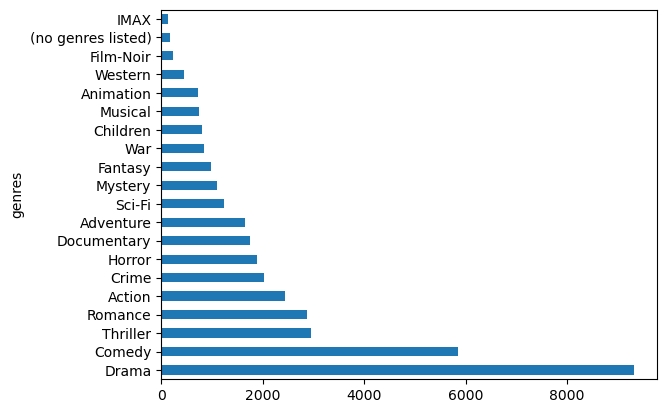

In [80]:
# Check distribution of genres after the split
genres_split["genres"].value_counts().plot(kind="barh")

### **link.csv**

In [ ]:
link_df = pd.read_csv('data/link.csv')
link_train, link_test = train_test_split(link_df, random_state=123, test_size=0.3)

In [81]:
# Reset index because it looks better :)
link_train = link_train.reset_index(drop=True)
link_test = link_test.reset_index(drop=True)
link_train.head(5)

,movieId,imdbId,tmdbId
0,30958,179526,93462.0
1,74673,1335992,22166.0
2,5776,82853,42146.0
3,1031,66817,12335.0
4,27309,231971,20160.0


In [83]:
print("Shape:", link_train.shape) # (19094, 4)
print("Info:", link_train.info()) 

Shape: (19094, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19094 entries, 0 to 19093
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  19094 non-null  int64  
 1   imdbId   19094 non-null  int64  
 2   tmdbId   18906 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 447.6 KB
Info: None


In [84]:
# Check for NaNs
link_train.isna().sum()

movieId      0
imdbId       0
tmdbId     188
dtype: int64

### **genome_scores.csv**

In [ ]:
genome_scores_df = pd.read_csv('data/genome_scores.csv')
genome_scores_train, genome_scores_test = train_test_split(genome_scores_df, random_state=123, test_size=0.3)

In [86]:
# Reset index because it looks better :)
genome_scores_train = genome_scores_train.reset_index(drop=True)
genome_scores_test = genome_scores_test.reset_index(drop=True)
genome_scores_train.head(5)

,movieId,tagId,relevance
0,3602,196,0.06975
1,80839,643,0.06375
2,7943,1026,0.19475
3,26101,1097,0.12900
4,5102,713,0.04100


In [ ]:
print("Shape:", genome_scores_train.shape) # (8196837, 3)
print("Info:", genome_scores_train.info()) 

Shape: (8196837, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196837 entries, 0 to 8196836
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 187.6 MB
Info: None


In [88]:
genome_scores_train.describe()

,movieId,tagId,relevance
count,8.196837e+06,8.196837e+06,8.196837e+06
mean,2.584349e+04,5.646798e+02,1.165225e-01
std,3.467781e+04,3.255995e+02,1.542803e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,2.926000e+03,2.830000e+02,2.425000e-02
50%,6.020000e+03,5.650000e+02,5.650000e-02
75%,4.606200e+04,8.470000e+02,1.415000e-01
max,1.311700e+05,1.128000e+03,1.000000e+00


### **genome_tag.csv**

In [ ]:
genome_tags_df = pd.read_csv('data/genome_tags.csv')
genome_tags_train, genome_tags_test = train_test_split(genome_tags_df, random_state=123, test_size=0.3)

## 2. Binary Classification

## 3. Feature Engineering

## 4. Model Implementation

Explain the process you followed to generate/choose the model. Do not invest too much time training/tuning your model. It will be enough for us if you choose an algorithm
and a configuration of hyperparameters you have seen in the past to work well for this type of problems. Please, explain and justify your selection of the algorithm and hyperparameters.

## 5. Feature Importance

Give an explanation of the importance of each feature, and show us which of the features you created had the highest impact on your model. Explain and justify your choice of the importance metric.

## 6. Conclusions

Add some comments summarizing your work. Also, add comments on how you would improve it if further time was given to you.